In [ ]:
import cv2

cap = cv2.VideoCapture(0)
ret, frame = cap.read()

if ret:
    cv2.imshow("Captured Image", frame)
    cv2.imwrite("image3.jpg", frame)
else:
    print("無法讀取影像")

cap.release()
cv2.destroyAllWindows()

In [2]:
!pip install mediapipe

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.1/36.1 MB 33.0 MB/s eta 0:00:00


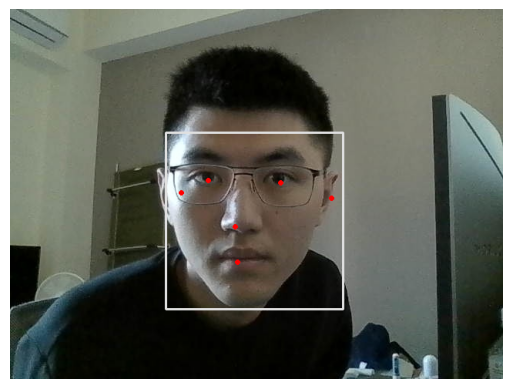

In [ ]:
import cv2
import mediapipe as mp
import matplotlib.pyplot as plt

mp_face_detection = mp.solutions.face_detection
mp_drawing = mp.solutions.drawing_utils

image = cv2.imread('image3.jpg')  # Changed the file name to 'image3.jpg'
                                  # This assumes that image3.jpg is the image you saved in previous cell
if image is None:
    print("無法讀取影像: image3.jpg") # Print error and exit if image can't be read.
    exit()
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

with mp_face_detection.FaceDetection(min_detection_confidence=0.2) as face_detection:
    results = face_detection.process(image_rgb)

    if results.detections:
        for detection in results.detections:
            mp_drawing.draw_detection(image, detection)

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()